<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Project 1: Decompositions of integers


<div markdown=1 class=Abstract>
* 30% Recursive programming
* 20% Arithmetic
* 20% Recurrences with `SymPy`
* 15% Generating functions
* 15% Combinatorics

## Table of contents

(The three parts are independent.)

- [Ordered decompositions](#OrderedDecomposition)
- [$L$-decompositions of integers](#Ldecomposition)
- [Non-increasing decompositions](#NID)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/customProject.css").read()
    return HTML(styles)
css_styling()

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy           # package for symbolic computation


Here are two cells that you can copy/paste throughout the Notebook:

<div markdown=1 class="Answers"> 
<i>Your answer.</i>

<div markdown=1 class="Prop"> 
<i>In this cell you can add your own additional questions (math or python).</i>

<a id="OrderedDecomposition"></a>
# Ordered decompositions

An <i>ordered decomposition</i> of $n\geq 1$ is a finite sequence of positive integers $(a_1,\dots,a_k)$ for some $k$, such that
<br>
$$
n=a_1+a_2+\dots +a_k. \qquad (\$)
$$
<br>
Let $D_n$ be the number of ordered decompositions of $n$. For example we have that $D_4=8$:
\begin{align*}
4&=4\\
&=1+3=3+1\\
&=1+1+2=1+2+1=2+1+1\\
&=2+2\\
&=1+1+1+1.
\end{align*}
(We see that order matters.)

<div markdown=1 class="DoIt"> 
1. Write a function `Ordered(n)` which returns the list of all ordered decompositions of $n$.
2. **(Theory)** How many ordered decompositions of $n$ are there?

<div markdown=1 class="Answers"><i>  
1) In this part, we want to generate all ordered decompositions of $n$.  
Let $A = (a_1, ... a_k)$.  
Notice that:
- If $k = 1$ then $A = (n)$.
- If $k \geq 2$ then $1 \leq a_1 \leq n-1$. For each value of $a_1$, we have: $n-a_1 = a_2 + ... + a_k$. Thus $A' = (a_2, ... a_k)$ is an ordered decomposition of $n-a_1$.  
Thus the recursive algorithm would be: $A = (n)$ is a valid decomposition. For each value of $a_1$, generate all ordered decompositions of $n-a_1$. For each of such decomposition $A'$, then $A = (a_1)+A'$ is an ordered decompositions of $n$. We can easily see that all of such decompositions are not duplicated (explains why order matters).

In [3]:
def Ordered(n):
    res = [[n]]
    for m in range(1, n):
        for d in Ordered(n-m):
            res.append([m]+d)
    return res

# Testing
for n in range(1, 6):
    r = Ordered(n)
    print("n = {}: len = {}, Ordered(n) = {}".format(n, len(r), r))

n = 1: len = 1, Ordered(n) = [[1]]
n = 2: len = 2, Ordered(n) = [[2], [1, 1]]
n = 3: len = 4, Ordered(n) = [[3], [1, 2], [1, 1, 1], [2, 1]]
n = 4: len = 8, Ordered(n) = [[4], [1, 3], [1, 1, 2], [1, 1, 1, 1], [1, 2, 1], [2, 2], [2, 1, 1], [3, 1]]
n = 5: len = 16, Ordered(n) = [[5], [1, 4], [1, 1, 3], [1, 1, 1, 2], [1, 1, 1, 1, 1], [1, 1, 2, 1], [1, 2, 2], [1, 2, 1, 1], [1, 3, 1], [2, 3], [2, 1, 2], [2, 1, 1, 1], [2, 2, 1], [3, 2], [3, 1, 1], [4, 1]]


<div markdown=1 class="Answers"><i>  
2) From the previous code, we can guess that the number of ordered decompositions for $n$ is $2^{n-1}$. We will prove it using strong induction.  
Let $S_n$ be the number of ordered decompositions of $n$. Notice that from the algorithm, we have the following equation: $S_1 = 1, S_n = 1+(S_1+S_2+...S_{n-1})$.
- Base case: $n = 1: S_n = 1 = 2^0 = 2^{n-1}$ (True)
- Asumme $S_n = 2^{n-1}$ is true for $n = 1, 2, ..., k$, we will show that it is also true for $n = k+1$.  
We have: $S_n = S_{k+1} = 1+\sum_{m = 1}^k S_m = 1+\sum_{m = 1}^k 2^{m-1} = 1 + (2^k-1) = 2^k = 2^{n-1}$.  
Thus by induction, we see that $S_n = 2^{n-1}$.

<div markdown=1 class="DoIt"> 
1. Write a function `OrderedBounded(n,k)` which returns the list of all ordered decompositions of $n$, if we impose that every $a_i$ in equation ($\$ $) is such that $a_i\leq k$.
2. Let $D_{n,k}$ be the number of ordered decompositions of $n$ where $a_i$'s are bounded by $k$. Can you find a formula for $D_{n,k}$ (at least for $k=2,3,4$)? Or just the order of growth (when $n\to+\infty$) of the sequence $(D_{n,k})_n$?<br>
<i>(You can use `solve`, `rsolve`, matrices, generating functions...)</i>

<div markdown=1 class="Answers"><i>  
1) Using the same idea with the algorithm from the previous part, the only different now is the condition $a_1 \leq k$. Thus the range of $a_1$ is $1 \leq a_1 \leq min(k, n-1)$. Also $A = (n)$ is a valid decomposition if and only if $n \leq k$.

In [4]:
def OrderedBounded(n, k):
    res = [[n]] if n <= k else []
    for m in range(1, 1+min(k, n-1)):
        for d in OrderedBounded(n-m, k):
            res.append([m]+d)
    return res

# Testing
for n in range(1, 5):
    print("n = {}".format(n))
    for k in range(1, n+1):
        r = OrderedBounded(n, k)
        print("- k = {}, count = {}, res = {}".format(k, len(r), r))

n = 1
- k = 1, count = 1, res = [[1]]
n = 2
- k = 1, count = 1, res = [[1, 1]]
- k = 2, count = 2, res = [[2], [1, 1]]
n = 3
- k = 1, count = 1, res = [[1, 1, 1]]
- k = 2, count = 3, res = [[1, 2], [1, 1, 1], [2, 1]]
- k = 3, count = 4, res = [[3], [1, 2], [1, 1, 1], [2, 1]]
n = 4
- k = 1, count = 1, res = [[1, 1, 1, 1]]
- k = 2, count = 5, res = [[1, 1, 2], [1, 1, 1, 1], [1, 2, 1], [2, 2], [2, 1, 1]]
- k = 3, count = 7, res = [[1, 3], [1, 1, 2], [1, 1, 1, 1], [1, 2, 1], [2, 2], [2, 1, 1], [3, 1]]
- k = 4, count = 8, res = [[4], [1, 3], [1, 1, 2], [1, 1, 1, 1], [1, 2, 1], [2, 2], [2, 1, 1], [3, 1]]


Let $D_{n, k}$ be the number of ordered decompositions of $n$ where $a_i \leq k$. We will try to find the formula for $D_{n, k}$ by finding the pattern with small $k$.  

In [5]:
for k in [2, 3, 4]:
    print("k = {}".format(k))
    print("Sequence of D_n: ", end="")
    for n in range(1, 10):
        r = OrderedBounded(n, k)
        print("{}".format(len(r)), end=" ")
    print()

k = 2
Sequence of D_n: 1 2 3 5 8 13 21 34 55 
k = 3
Sequence of D_n: 1 2 4 7 13 24 44 81 149 
k = 4
Sequence of D_n: 1 2 4 8 15 29 56 108 208 


<div markdown=1 class="Answers"><i>  
2) From the algorithm, we see the following equation: $D_{n, k} = 1_{n \leq k} + \sum_{m = 1}^{min(k, n-1)} D_{n-m, k}$  
$\Rightarrow D_{n, k} = 1+\sum_{m = 1}^{n-1} D_{m, k}$ for $n \leq k$, $D_{n, k} = \sum_{m = n-k}^{n-1} D_{m, k}$ for $n \geq k+1$  
Note that for the case of $n <= k$, from the previous part we have proven that the number of ordered decompositions in such case is $2^{n-1}$, or formally $D_{n, k} = 2^{n-1}$ with $n \leq k$.  
Therefore, we have:  
$D_{n, k} = 2^{n-1}$ for $n = 1,...k$, $D_{n, k} = \sum_{m = n-k}^{n-1} D_{m, k} = D_{n-k, k}+...+D_{n-1, k}$ for $n > k$

Fix k. We will find the formula of $D_{n, k}$.  
Let $Z_n = \left(\begin{array}{cc} D_{n, k} \\ D_{n+1, k} \\ ... \\ D_{n+(k-1), k} \\ \end{array}\right)$. Then $Z_1 = \left(\begin{array}{cc} 2^0 \\ 2^1 \\ ... \\ 2^{k-1} \\ \end{array}\right)$.  
And we have the following relation:
$\left(\begin{array}{cc} D_{n+1, k} \\ D_{n+2, k} \\ ... \\ D_{n+(k-1), k} \\ D_{n+k, k} \\ \end{array}\right) =
\left(\begin{array}{cc}
0 & 1 & 0 & 0 & ... \\
0 & 0 & 1 & 0 & ... \\
0 & ... & ... & ... & ... \\
0 & ... & ... & ... & 1 \\ 
1 & 1 & 1 & ... & 1 \\ \end{array}\right)
\left(\begin{array}{cc} D_{n, k} \\ D_{n+1, k} \\ ... \\ ... \\ D_{n+(k-1), k} \\ \end{array}\right)$  

Or $Z_{n+1} = AZ_n$ with $A$ is a $k*k$ matrix: $A_{i, j} = 1$ if $i = k$ or $i < k, j = i+1$, $A_{i, j} = 0$ otherwise.  
From here, we can easily deduce the general formula for $Z_n$: $Z_n = A^{n-1}Z_1$ and $D_{n, k} = (Z_n)_1$ ($k = 2$ is the Fibonacci sequence).

We will study the order of growth of $D_{n, k}$ by studying the matrix $A$.  


We can easily see that the characteristic polynomial of $A$ is the polynomial: $x^k = x^{k-1}+x^{k-2}...+x+1$ or $P(x) = x^k-x^{k-1}-x^{k-2}...-x-1 = 0$ (due to $D_{n, k} = \sum_{m = n-k}^{n-1} D_{m, k} = D_{n-k, k}+...+D_{n-1, k}$).  
Assume all of its eigenvalues are different (it is true but too complicated to prove here) then we have that $Z_n$ is a linear combination of its eigenvalues taking power of $n$, or more formally, $Z_n = \sum_{m = 1}^k c_m\lambda_m^n$.  
(This can be seen because by diagonalization $A = D^{-1}BD$ then $A^n = D^{-1}B^nD \Rightarrow A^{n-1}Z_1 = D^{-1}B^nD(A^{-1}Z_1)$, and $B^n$ is the diagonal matrix where its value on the diagonal line is $(\lambda_m)^n$.  
Therefore, with $\lambda = max(|\lambda_m|)$, $Z_n \sim c\lambda^n$, or the order of growth of $D_{n, k}$ is equal to the max eigenvalues of $A$, or max of norms of roots of $P(x)$.  

For smaller case of $k$:
- k = 2: $A = \left(\begin{array}{cc} 0 & 1 \\ 1 & 1 \\ \end{array}\right) \Rightarrow P(X) = X^2-X-1 = 0 \Rightarrow max(|\lambda_k|) = \frac{1+\sqrt{5}}{2} \sim 1.618$
- k = 3: $A = \left(\begin{array}{cc} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 1 & 1 \\ \end{array}\right) \Rightarrow P(X) = X^3-X^2-X-1 = 0 \Rightarrow max(|\lambda_k|) \sim 1.8393$
- k = 4: $A = \left(\begin{array}{cc} 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 1 & 1 & 1 & 1 \\ \end{array}\right) \Rightarrow P(X) = X^4-X^3-X^2-X-1 = 0 \Rightarrow max(|\lambda_k|) \sim 1.9276$

In [6]:
x = sympy.symbols('x')

P = {2: x**2-x-1, 3: x**3-x**2-x-1, 4: x**4-x**3-x**2-x-1}
for k in [2, 3, 4]:
    res = sympy.solve(P[k], x)
    abs_root = []
    for root in res:
        abs_root.append(sympy.re(sympy.N(sympy.Abs(root))))
    print("Order of growth for k = {}: {}".format(k, round(max(abs_root), 4)))

Order of growth for k = 2: 1.618
Order of growth for k = 3: 1.8393
Order of growth for k = 4: 1.9276


<a id="Ldecomposition"></a>
# $L$-decompositions of integers

This problem is defined as follows. Let $L=[a_1,a_2,\dots,a_k]$ be a list of distinct positive integers. 

For a fixed integer $n\geq 1$ we ask for the number of solutions  $(x_1,\dots,x_k)$ to the equation<br><br>
$$
a_1 x_1 +a_2 x_2 + \dots a_k x_k=n, \qquad\qquad (\star)
$$
<br>
where $x_i$'s are non-negative integers.
We denote by $H_n(L)$ be the number of such solutions. For example, $H_6([1,2,5])=5$, since

\begin{align*}
6&=1\times 1+1\times 5 \\
&=3\times 2\\
&=2\times 1+2\times 2\\
&=4\times 1+1\times 2\\
&=6\times 1 
\end{align*}

In other words, the solutions to $(\star)$ are:
$$
(x_1,x_2,x_3)=(1,0,1),\quad (0,3,0),\quad (2,2,0),\quad (4,1,0),\quad (6,0,0) 
$$

The typical questions we will ask are:
* Can we find an exact formula for $H_n(L)$? (At least when $L$ is simple.)
* How does $H_n(L)$ grow when $n\to +\infty$? (Can we find a simple equivalent?)
* How to find all the solutions of equation $(\star)$?


## The particular case $L=[1,2,5]$

<div markdown=1 class="DoIt"> 
1. Write $H_n([1,2])$ in terms of $H_1([1,2]),\dots,H_{n-1}([1,2])$. Write  $H_n([1,2,5])$ as a function of $H_1([1,2]),\dots,H_n([1,2])$ and  $H_1([1,2,5]),\dots,H_{n-1}([1,2,5])$ (prove your formulas).

2. Deduce from these recurrence formulas:
 - A function `NumberSolutions125(n)` which computes $H_n([1,2,5])$.
 - A plot of $n\mapsto H_n([1,2,5])$. Can you guess the order of growth of $H_n([1,2,5])$ when $n$ grows?

<div markdown=1 class="Answers"><i>  
1) Consider $L = [1, 2]$, then $x + 2y = n$.  
Let $S_n = \{(x, y) | x+2y = n\}$, then $H_n([1, 2]) = |S_n|$. Note that $(0, y) \in S_n$ if and only if n is divisible by 2. Therefore:
- If n is divisible 2: The map $f: S_n \backslash (0, \frac{n}{2}) \rightarrow S_{n-1}: f((x, y)) = (x-1, y)$ is bijective $\Rightarrow |S_n| = |S_{n-1}|+1$
-  If n is not divisible 2: The map $f: S_n \rightarrow S_{n-1}: f((x, y)) = (x-1, y)$ is bijective $\Rightarrow |S_n| = |S_{n-1}|$  
Thus, $H_n([1, 2]) = H_{n-1}([1, 2]) + 1_{2|n}$ and $H_1[1, 2] = 1$ (only solution is $(x, y) = (1, 0)$)

Consider $L = [1, 2, 5]$, then $x + 2y + 5z = n$  
Let
$$T_n = \{(x, y, z) \, | \, x+2y+5z = n\} \Rightarrow H_n([1, 2, 5]) = |T_n|$$.  
Also, let $T'_n = \{(x, y, 0) \, | \, x+2y = n\}$.  
The map $f: T'_n \rightarrow S_n: f((x, y, 0)) = (x, y)$ is bijective (because $x+2y+0z = x+2y = n$) $\Rightarrow |T'_n| = |S_n|$.  
We can easily see that $T'_n \subset T_n$ and $T_n \backslash T'_n = \{(x, y, z) \, | \, x+2y+5z = n, z > 0\}$.  
Also: $H_n([1, 2, 5]) = |T_n| = |T'_n| + |T_n \backslash T'_n| = |S_n| + |T_n \backslash T'_n| = H_n([1, 2]) + |T_n \backslash T'_n|$
- If $n < 5$ then $5z < 5$ or $z = 0$, so $T_n \backslash T'_n = \emptyset$
- If $n = 5$ then $T_n \backslash T'_n = \{(0, 0, 1)\}$.
- If $n > 5$ then the map $g: T_n \backslash T'_n \rightarrow T_{n-5}: f((x, y, z)) = (x, y, z-1)$ is bijective (because $x+2y+5(z-1) = x+2y+5z-5 = n-5$) $\Rightarrow |T_n \backslash T'_n| = |T_{n-5}|$  
Thus, $H_n([1, 2, 5]) = H_n([1, 2])$ for $n < 5$, $H_n([1, 2, 5]) = H_n([1, 2]) + 1$ for $n = 5$, $H_n([1, 2, 5]) = H_{n-5}([1, 2, 5]) + H_n([1, 2])$ for $n \geq 5$

A small note here is if we code the algorithm naively, the program would suffer from slow speed at large value of $n$ due to too much calculations from recursion. Thus we would improve the speed by using dynamic programming (memoization). We would also optimize the speed of calculating $H_n([1, 2])$ by a small observation that $H_n([1, 2]) = \frac{n}{2}+1$ if $n$ is even, $H_n([1, 2]) = \frac{n-1}{2}+1$ if $n$ is odd (easily be proven by induction) or in short $H_n([1, 2]) = \lfloor\frac{n}{2}\rfloor+1$ 

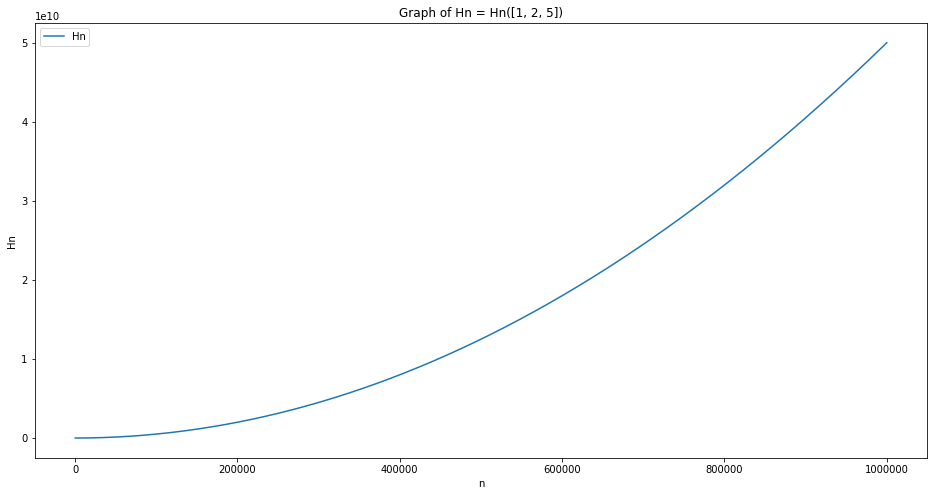

In [64]:
# L = [1, 2]
def NumberofSolution12(n):
    if (n == 1): return 1
    return NumberofSolution12(n-1)+(0 if n % 2 else 1)
    
# L = [1, 2, 5]
def NumberofSolution125(n):
    if (n < 5): return NumberofSolution12(n)
    if (n == 5): return NumberofSolution12(n)+1
    return NumberofSolution125(n-5)+NumberofSolution12(n)

# Improved algorithms 
def N12(n): return n//2 + 1

memory = {}
def N125(n):
    if (n < 5): return N12(n)
    if (n == 5): return N12(n)+1
    if n in memory: return memory[n]
    res = N125(n-5)+N12(n)
    memory[n] = res
    return res
    
# Plotting
maxn = 1000000
N = np.arange(1, maxn)
Hn = []
for n in N:
    Hn.append(N125(n))

plt.figure(figsize=(16, 8))
plt.plot(N, Hn, label="Hn")
plt.title("Graph of Hn = Hn([1, 2, 5])")
plt.xlabel("n")
plt.ylabel("Hn")
plt.legend()
plt.show()

<div markdown=1 class="Answers"><i>  
We want to guess the growth rate of $H_n([1, 2, 5])$.  
Note that $H_n([1, 2]) \sim \frac{n}{2}$, thus $H_n([1, 2, 5]) \sim \frac{n}{2}+\frac{n-5}{2}+\frac{n-10}{2}+...$, (around $\frac{n}{5}$ terms), which means $H_n([1, 2, 5])$ grows quadratically: $H_n([1, 2, 5]) = O(n^2)$  

Moreover, we see that $\frac{n}{2}+\frac{n-5}{2}+\frac{n-10}{2}+... \sim \frac{\frac{n}{2}}{2}\centerdot\frac{n}{5} \sim \frac{n^2}{20}$ (arithmetic sequence).

We will graph our guess to check the hypothesis.

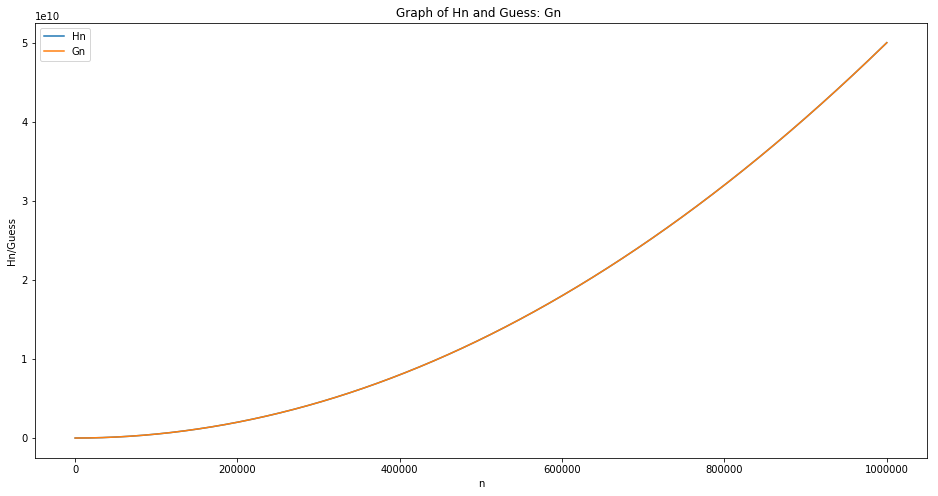

In [65]:
# Check our guess
Gn = []
for n in N:
    Gn.append(1/20*n**2)

plt.figure(figsize=(16, 8))
plt.plot(N, Hn, label="Hn")
plt.plot(N, Gn, label="Gn")
plt.title("Graph of Hn and Guess: Gn ")
plt.xlabel("n")
plt.ylabel("Hn/Guess")
plt.legend()
plt.show()

<div markdown=1 class="Answers"><i>  
The above graph did confirm our hypothesis: $H_n([1, 2, 5]) \sim \frac{n^2}{20}$. In the following part, we will try to find the explicit formula for $H_n([1, 2, 5])$ to cross-check with this result.

<div markdown=1 class="DoIt"> **(More difficult)**
Use the recurrence formulas to find an explicit formula for the number $H_n([1,2,5])$ with `SymPy`. You can use pen & paper, `solve`, `rsolve`, ... You can compare different methods!

<div markdown=1 class="Answers"><i>
We have the following equation from the previous part:  
- $H_n([1, 2]) = 1+\lfloor\frac{n}{2}\rfloor$
- $H_n([1, 2, 5]) = H_n([1, 2])$ for $n < 5$, $H_n([1, 2, 5]) = H_n([1, 2]) + 1$ for $n = 5$, $H_n([1, 2, 5]) = H_{n-5}([1, 2, 5]) + H_n([1, 2])$ for $n \geq 5$  

We can easily see that the sequence $H_n([1, 2, 5])$ can be decomposed as 5 recursive sequences.  
More formally, with $k \in [1, 2, 3, 4, 5]$, let
$$(S_k)_n: (S_k)_i = H_{5(i-1)+k}([1, 2, 5]) \, \forall i \geq 1$$  

We will consider the case $k = 1$ here:
$$(S_1)_n: (S_1)_1 = H_1([1, 2, 5]) = 1, \\
\forall n \geq 1: (S_1)_{n+1} = H_{5n+1}([1, 2, 5]) = H_{5n-4}([1, 2, 5])+H_{5n+1}([1, 2]) = (S_1)_n + \lfloor\frac{5n+1}{2}\rfloor$$

Thus, for $n \geq 3$:
$$(S_1)_{n+1} = (S_1)_n + \lfloor\frac{5n+1}{2}\rfloor \\
(S_1)_{n-1} = (S_1)_{n-2} + \lfloor\frac{5(n-2)+1}{2}\rfloor = (S_1)_{n-2} + \lfloor\frac{5n+1}{2}\rfloor-5 \\
\Rightarrow (S_1)_{n+1} = (S_1)_{n}+(S_1)_{n-1}-(S_1)_{n-2}+5$$

Let's try with `rsolve` from `sympy`

In [33]:
S = sympy.Function('S')
n = sympy.symbols('n', integer=True)
f = S(n+1)-S(n)-S(n-1)+S(n-2)
Formula = sympy.rsolve(f, S(n), {S(1): 1, S(2): 5, S(3): 11})

print(str(Formula))

None


<div markdown=1 class="Answers"><i> As we can see, `rsolve` failed to solve the sequence. We will continue solving the sequence manually.  

To make the sequence homogenuous: for $n \geq 4$:
$$(S_1)_{n+1} = (S_1)_n+(S_1)_{n-1}-(S_1)_{n-2}+5 \\
(S_1)_n = (S_1)_{n-1}+(S_1)_{n-2}-(S_1)_{n-3}+5 \\
\Rightarrow (S_1)_{n+1} = 2(S_1)_n-2(S_1)_{n-2}+(S_1)_{n-3}$$  

The characteristic polynomial of the sequence is:
$$X^4 = 2X^3-2X+1 \Rightarrow (X-1)^3(X+1) = 0$$  

Therefore the general form of the sequence is:
$$S_n = (c_0+c_1n+c_2n^2)1^n + c_3(-1)^n = c_0+c_1n+c_2n^2+c_3(-1)^n$$
with $c_0, c_1, c_2, c_3$ are constants depends on initial values $S_1, S_2, S_3, S_4$

Plug in the value when $n = 1, 2, 3, 4$, we have:
$$
S_1 = c_0+c_1+c_2-c_3 = 1 \\
S_2 = c_0+2c_1+4c_2+c_3 = 5 \\
S_3 = c_0+3c_1+9c_2-c_3 = 11 \\
S_4 = c_0+4c_1+16c_2+c_3 = 20 \\
\Rightarrow
\left(\begin{array}{cc} c_0 \\ c_1 \\ c_2 \\ c_3 \\ \end{array}\right) =
\left(\begin{array}{cc}
1 & 1 & 0 & -1 \\
1 & 2 & 4 & 1 \\
1 & 3 & 9 & -1 \\
1 & 4 & 16 & 1 \\ \end{array}\right)^{-1}
\left(\begin{array}{cc} 1 \\ 5 \\ 11 \\ 20 \\ \end{array}\right) = 
\left(\begin{array}{cc} \frac{-1}{8} \\ 0 \\ \frac{5}{4} \\ \frac{1}{8} \\ \end{array}\right)
$$

Therefore we obtain the formula:
$$H_{5n-4} = (S_1)_n = \frac{10n^2-1+(-1)^n}{8} \forall n \geq 1$$

In [49]:
#Double check recursive sequence

def S1(n): return N125(5*n-4)
for n in range(4, 10):
    print("n = {}: S1_(n+1) = {}, 2*S1_(n)-2*S1_(n-2)+S1_(n-3) = {}".format(n, S1(n+1), 2*S1(n)-2*S1(n-2)+S1(n-3)))

print("_______")
#Calculating the constants

mat = sympy.Matrix([[1, 1, 1, -1], [1, 2, 4, 1], [1, 3, 9, -1], [1, 4, 16, 1]])
z = sympy.Matrix([[1], [5], [11], [20]])
print(mat**(-1)*z)

print("_______")
#Double check the answer
def guess1(n): return (10*n**2-1+(-1)**n)/8

for n in range(1, 15):
    print("n = {}: S1_(n) = {}, guess(n) = {}".format(n, S1(n), guess1(n)))

n = 4: S1_(n+1) = 31, 2*S1_(n)-2*S1_(n-2)+S1_(n-3) = 31
n = 5: S1_(n+1) = 45, 2*S1_(n)-2*S1_(n-2)+S1_(n-3) = 45
n = 6: S1_(n+1) = 61, 2*S1_(n)-2*S1_(n-2)+S1_(n-3) = 61
n = 7: S1_(n+1) = 80, 2*S1_(n)-2*S1_(n-2)+S1_(n-3) = 80
n = 8: S1_(n+1) = 101, 2*S1_(n)-2*S1_(n-2)+S1_(n-3) = 101
n = 9: S1_(n+1) = 125, 2*S1_(n)-2*S1_(n-2)+S1_(n-3) = 125
_______
Matrix([[-1/8], [0], [5/4], [1/8]])
_______
n = 1: S1_(n) = 1, guess(n) = 1.0
n = 2: S1_(n) = 5, guess(n) = 5.0
n = 3: S1_(n) = 11, guess(n) = 11.0
n = 4: S1_(n) = 20, guess(n) = 20.0
n = 5: S1_(n) = 31, guess(n) = 31.0
n = 6: S1_(n) = 45, guess(n) = 45.0
n = 7: S1_(n) = 61, guess(n) = 61.0
n = 8: S1_(n) = 80, guess(n) = 80.0
n = 9: S1_(n) = 101, guess(n) = 101.0
n = 10: S1_(n) = 125, guess(n) = 125.0
n = 11: S1_(n) = 151, guess(n) = 151.0
n = 12: S1_(n) = 180, guess(n) = 180.0
n = 13: S1_(n) = 211, guess(n) = 211.0
n = 14: S1_(n) = 245, guess(n) = 245.0


<div markdown=1 class="Answers"><i>  
From the code above, we obtain the desire results of case $k = 1$

<div markdown=1 class="DoIt"> 
Write a function `ListOfSolutions(n)` which returns the list of all solutions to equation $(\star)$ when $L=[1,2,5]$.

<div markdown=1 class="Answers"><i>
We want to generate all solutions with $L = [1, 2, 5]$ or $\{(x, y, z) | x+2y+5z = n\}$. The simpliest way to generate them is the brute force with 3 nested for loops.  
Note that $x \leq n, y \leq \lfloor\frac{n}{2}\rfloor, y \leq \lfloor\frac{n}{5}\rfloor$

In [13]:
def ListOfSolutions(n):
    res = []
    for x in range(n+1):
        for y in range(n//2+1):
            for z in range(n//5+1):
                if (x+2*y+5*z == n): res.append([x, y, z])
    return res

# Testing
for n in range(12):
    print("n = {}: {}".format(n, ListOfSolutions(n)))

n = 0: [[0, 0, 0]]
n = 1: [[1, 0, 0]]
n = 2: [[0, 1, 0], [2, 0, 0]]
n = 3: [[1, 1, 0], [3, 0, 0]]
n = 4: [[0, 2, 0], [2, 1, 0], [4, 0, 0]]
n = 5: [[0, 0, 1], [1, 2, 0], [3, 1, 0], [5, 0, 0]]
n = 6: [[0, 3, 0], [1, 0, 1], [2, 2, 0], [4, 1, 0], [6, 0, 0]]
n = 7: [[0, 1, 1], [1, 3, 0], [2, 0, 1], [3, 2, 0], [5, 1, 0], [7, 0, 0]]
n = 8: [[0, 4, 0], [1, 1, 1], [2, 3, 0], [3, 0, 1], [4, 2, 0], [6, 1, 0], [8, 0, 0]]
n = 9: [[0, 2, 1], [1, 4, 0], [2, 1, 1], [3, 3, 0], [4, 0, 1], [5, 2, 0], [7, 1, 0], [9, 0, 0]]
n = 10: [[0, 0, 2], [0, 5, 0], [1, 2, 1], [2, 4, 0], [3, 1, 1], [4, 3, 0], [5, 0, 1], [6, 2, 0], [8, 1, 0], [10, 0, 0]]
n = 11: [[0, 3, 1], [1, 0, 2], [1, 5, 0], [2, 2, 1], [3, 4, 0], [4, 1, 1], [5, 3, 0], [6, 0, 1], [7, 2, 0], [9, 1, 0], [11, 0, 0]]


<div markdown=1 class="DoIt"> 
1. **(Theory)** Find the generating function associated to the sequence $H_n([1,2,5])$. 
2. Deduce another function `NumberSolutions125_GF(n)` which returns $H_n([1,2,5])$. You can compare execution times with `NumberSolutions125(n)`.
3. Use generating functions to prove (or reprove) using `SymPy` an explicit formula for $H_n([1,2,5])$. You can also us generating functions to find an asymptotic equivalent of $H_n([1,2,5])$.

## The case of a general $L$
We turn to the general case: we want to write a function `NumberSolutions(n,L)` which takes as input an integer $n$ and a list $L$ and returns $H_n(L)$.

<div markdown=1 class="DoIt"> 
1. Write a function `NumberSolutions(n,L)` which returns the number of solutions to $(\star)$. (In particular `NumberSolutions(n,[1,2,5])` should be equal to `NumberSolutions125(n)`.) Explain mathematically why your algorithm is correct.

2. Plot $n\mapsto H_n(L)$ with several $L$'s which show that different kinds of asymptotic behaviours may arise.
3. Write a function `ListOfSolutions(n,L)` which returns the list of all solutions to equation $(\star)$ in the general case.


<div markdown=1 class="DoIt">  **(Theory)** 

1. Find a condition on $L$ which ensures that for every large enough $n$, $H_n(L)$ is always $>0$.
2. Find a formula for the generating function associated to $H_n(L)$.
3. **(More difficult)** Using generating functions, find the order of growth of $H_n(L)$. You can make some restrictions on $L$.

<a id="NID"></a>
# Non-increasing decompositions

A <i>non-increasing decomposition</i> (NID) of $n\geq 1$ in $k$ <i>parts</i> is a non-increasing sequence of positive integers $u_1\geq u_2 \geq  \dots \geq u_k$ such that
$$
n=u_1+u_2+\dots +u_k.
$$

For example there are $4$ NIDs of $n=7$ in $k=3$ parts:
\begin{align*}
7&= 5+1+1\\
&= 4+2+1\\
&=3+3+1\\
&= 3+2+2.
\end{align*}

We denote by $N_{n,k}$ the number of NIDs of $n$ in $k$ parts and by $N_n=\sum_{k\geq 1} N_{n,k}$ the total number of NIDs. We set $N_0=1$.

<div markdown=1 class="DoIt"> 
1. Write a function `NID(n,k)` which returns the value of $N_{n,k}$. Same question for $N_{n}$ (try to write an efficient algorithm).
2. Can you use your function to estimate an approximation of the order of growth of $N_n$? 
3. Write a function `ListNID(n,k)` which returns the list of all NIDs of $n$ in $k$ parts. 

A NID of $n$ with parts less than $j$ is a NID of $n$ of the form $j\geq u_1\geq u_2 \geq  \dots \geq u_k$ for some $k$.<br><br>
For example there are $4$ NIDs of $n=7$ with parts less than $j=2$:
\begin{align*}
7&= 2+2+2+1\\
&= 2+1+1+1+1+1\\
&=1+1+1+1+1+1+1\\
\end{align*}
Let $L_{n,j}$ be the number of NIDs of $n$ in parts less than $j$.

<div markdown=1 class="DoIt"> 
1. Write a function `NID_less_than_j(n,j)` which returns the value of $L_{n,j}$.
2. **(Difficult)** Can you find a combinatorial proof that
$$
\sum_{k\leq j} N_{n,k} = L_{n,j}?
$$
3. Check this conjecture with your functions. (You can test the formula even if you were not able to prove it.)

### NIDs with generating functions **(More difficult)**

One can prove that the following formula for the generating function of $N_n$ is given by<br>
<br>
$$
\mathcal{N}(x)=\sum_{n= 0}^{+\infty} N_n x^n = \prod_{k= 1}^{+\infty} \frac{1}{1-x^k}.\qquad (\star)
$$

<div markdown=1 class="DoIt"> 
1. Justify the formula ($\star$). <i>(A fully rigorous proof is beyond the level of Bachelor 2.)</i> 
2. Use `SymPy` to write a script that uses ($\star$) to compute $N_1,\dots,N_{20}$.<br>
(<i>You can try 2) even if you did not succeed at question 1) </i>)